<a href="https://colab.research.google.com/github/prakarsh-jain/EST_Project/blob/main/LULC_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Graph successfully created and saved as 'tree_cover_trend.png'


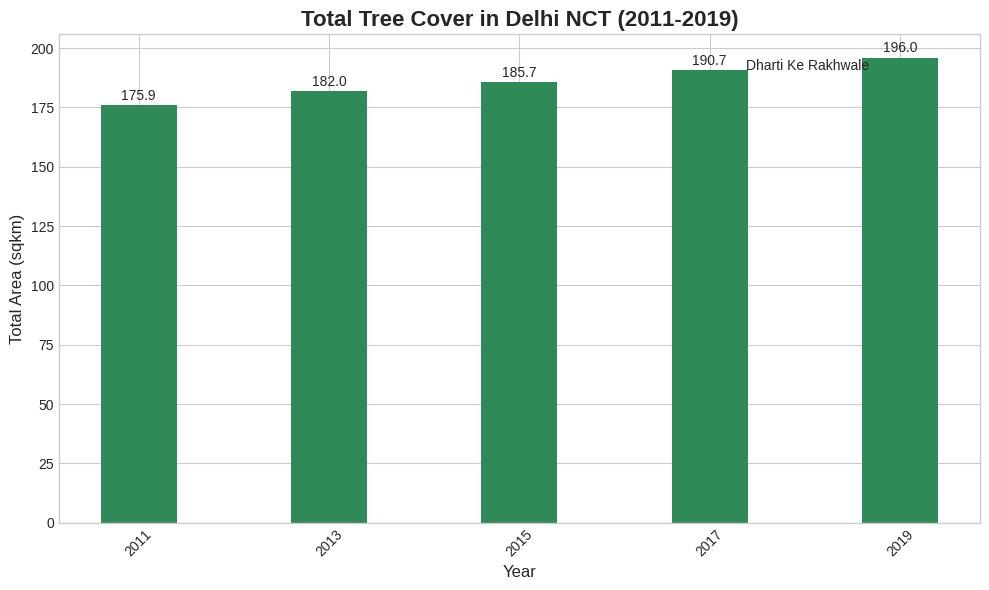

In [1]:
#Time series Graph
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# --- Configuration ---
# Update this to your exact CSV filename
csv_filename = 'Tree_Cover(2011-2019)_CleanedData.csv'

# --- Read and Plot Data ---
try:
    # Read the data from your cleaned CSV file
    df = pd.read_csv(csv_filename)

    # Create the plot
    plt.style.use('seaborn-v0_8-whitegrid') # Sets a nice-looking style
    fig, ax = plt.subplots(figsize=(10, 6)) # Adjusts the size of the plot

    # Create a bar chart
    ax.bar(df['Year'], df['Total_Cover_Area_sqkm'], color='#2E8B57')

    # --- Formatting the Plot ---
    # Add a title and labels
    ax.set_title('Total Tree Cover in Delhi NCT (2011-2019)', fontsize=16, fontweight='bold')
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Total Area (sqkm)', fontsize=12)

    # Make sure all years are displayed as whole numbers on the x-axis
    ax.set_xticks(df['Year'])
    ax.tick_params(axis='x', rotation=45)

    # Format the y-axis to avoid scientific notation
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

    # Add data labels on top of each bar
    for index, value in enumerate(df['Total_Cover_Area_sqkm']):
        ax.text(df['Year'][index], value + 1, f'{value:.1f}', ha='center', va='bottom')

    plt.tight_layout() # Adjusts plot to prevent labels from overlapping

    # --- Save and Show the Plot ---
    output_graph_filename = 'tree_cover_trend.png'
    plt.savefig(output_graph_filename, dpi=300) # Save the plot as a high-quality image

    print(f"✅ Graph successfully created and saved as '{output_graph_filename}'")
    plt.text(0.88, 0.95, 'Dharti Ke Rakhwale', transform=ax.transAxes, fontsize=10,
            verticalalignment='top', horizontalalignment='right')

    plt.show() # Display the plot

except FileNotFoundError:
    print(f"❌ Error: Could not find the file '{csv_filename}'. Please make sure you have uploaded it to Colab.")

In [16]:
import pandas as pd
import geopandas as gpd
import os

# --- File Configuration ---
# Ensure these filenames match your uploaded files
files_to_process = [
    ('2011.geojson', '2013.geojson'),
    ('2013.geojson', '2015.geojson'),
    ('2015.geojson', '2017.geojson'),
    ('2017.geojson', '2019.geojson'),
    ('2011.geojson', '2019.geojson')
]

# --- Main Loop to Process Each Pair ---
all_results = []
print("Starting pairwise indicator calculation...")

for start_file, end_file in files_to_process:
    try:
        start_year = os.path.basename(start_file).split('.')[0]
        end_year = os.path.basename(end_file).split('.')[0]
        period_name = f"{start_year}-{end_year}"

        print(f"--- Processing {period_name} ---")

        # Read files
        gdf_start = gpd.read_file(start_file)
        gdf_end = gpd.read_file(end_file)

        # Calculate total area at the start of the period for % change calculation
        start_total_area = gdf_start['Shape_Area'].sum()

        # Perform Spatial Difference
        gain = gpd.overlay(gdf_end, gdf_start, how='difference')
        loss = gpd.overlay(gdf_start, gdf_end, how='difference')

        gain = gain.to_crs(epsg=3857)
        loss = loss.to_crs(epsg=3857)

        # Calculate total area of gain and loss in square meters
        gain_area_sqm = gain.geometry.area.sum()
        loss_area_sqm = loss.geometry.area.sum()

        # Convert to square kilometers
        gain_area_sqkm = gain_area_sqm / 1_000_000
        loss_area_sqkm = loss_area_sqm / 1_000_000

        # Calculate indicators
        net_change_sqkm = gain_area_sqkm - loss_area_sqkm
        percent_change = (net_change_sqkm / (start_total_area / 1_000_000)) * 100

        # Store results
        all_results.append({
            'Period': period_name,
            'Gain_sqkm': gain_area_sqkm,
            'Loss_sqkm': loss_area_sqkm,
            'Net_Change_sqkm': net_change_sqkm,
            'Percent_Change': percent_change
        })

    except Exception as e:
        print(f"❌ An error occurred while processing {period_name}: {e}")

# --- Display Final Summary Table ---
if all_results:
    summary_df = pd.DataFrame(all_results)
    summary_df = summary_df.round(3) # Round for neatness

    print("\n" + "="*50)
    print("      Final Summary of Biennial Tree Cover Change")
    print("="*50)
    print(summary_df.to_string(index=False))
else:
    print("\nNo data was processed.")

Starting pairwise indicator calculation...
--- Processing 2011-2013 ---


/usr/local/lib/python3.12/dist-packages/geopandas/tools/overlay.py:358: UserWarning: `keep_geom_type=True` in overlay resulted in 359 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  result = _collection_extract(result, geom_type, keep_geom_type_warning)
/usr/local/lib/python3.12/dist-packages/geopandas/tools/overlay.py:358: UserWarning: `keep_geom_type=True` in overlay resulted in 168 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  result = _collection_extract(result, geom_type, keep_geom_type_warning)


--- Processing 2013-2015 ---


/usr/local/lib/python3.12/dist-packages/geopandas/tools/overlay.py:358: UserWarning: `keep_geom_type=True` in overlay resulted in 82 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  result = _collection_extract(result, geom_type, keep_geom_type_warning)
/usr/local/lib/python3.12/dist-packages/geopandas/tools/overlay.py:358: UserWarning: `keep_geom_type=True` in overlay resulted in 225 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  result = _collection_extract(result, geom_type, keep_geom_type_warning)


--- Processing 2015-2017 ---


/usr/local/lib/python3.12/dist-packages/geopandas/tools/overlay.py:358: UserWarning: `keep_geom_type=True` in overlay resulted in 56 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  result = _collection_extract(result, geom_type, keep_geom_type_warning)
/usr/local/lib/python3.12/dist-packages/geopandas/tools/overlay.py:358: UserWarning: `keep_geom_type=True` in overlay resulted in 522 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  result = _collection_extract(result, geom_type, keep_geom_type_warning)


--- Processing 2017-2019 ---


/usr/local/lib/python3.12/dist-packages/geopandas/tools/overlay.py:358: UserWarning: `keep_geom_type=True` in overlay resulted in 327 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  result = _collection_extract(result, geom_type, keep_geom_type_warning)
/usr/local/lib/python3.12/dist-packages/geopandas/tools/overlay.py:358: UserWarning: `keep_geom_type=True` in overlay resulted in 135 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  result = _collection_extract(result, geom_type, keep_geom_type_warning)


--- Processing 2011-2019 ---


/usr/local/lib/python3.12/dist-packages/geopandas/tools/overlay.py:358: UserWarning: `keep_geom_type=True` in overlay resulted in 149 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  result = _collection_extract(result, geom_type, keep_geom_type_warning)



      Final Summary of Biennial Tree Cover Change
   Period  Gain_sqkm  Loss_sqkm  Net_Change_sqkm  Percent_Change
2011-2013     86.960     79.154            7.806           4.438
2013-2015     12.776      7.940            4.836           2.658
2015-2017     22.698     16.137            6.561           3.533
2017-2019     56.200     49.337            6.863           3.598
2011-2019     96.152     70.087           26.065          14.821


/usr/local/lib/python3.12/dist-packages/geopandas/tools/overlay.py:358: UserWarning: `keep_geom_type=True` in overlay resulted in 308 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  result = _collection_extract(result, geom_type, keep_geom_type_warning)


In [4]:
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 87.8 MB/s eta 0:00:00


Starting automated map generation for all pairs...

--- Processing 2011 vs 2013 ---


/usr/local/lib/python3.12/dist-packages/geopandas/tools/overlay.py:358: UserWarning: `keep_geom_type=True` in overlay resulted in 359 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  result = _collection_extract(result, geom_type, keep_geom_type_warning)
/usr/local/lib/python3.12/dist-packages/geopandas/tools/overlay.py:358: UserWarning: `keep_geom_type=True` in overlay resulted in 168 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  result = _collection_extract(result, geom_type, keep_geom_type_warning)


✅ Map successfully created and saved as 'map_2011_vs_2013.png'


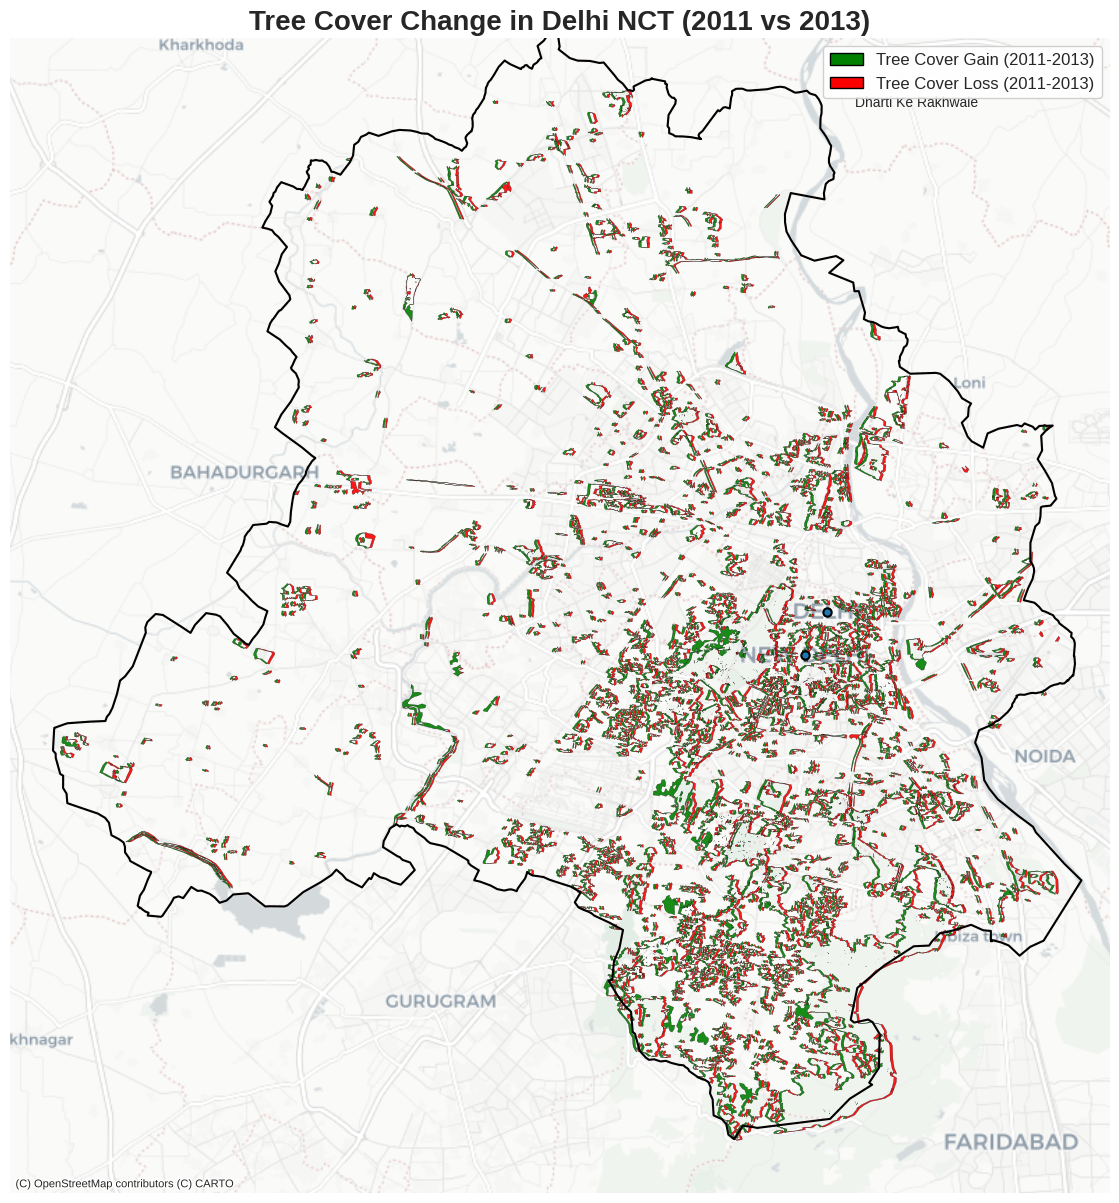


--- Processing 2013 vs 2015 ---


/usr/local/lib/python3.12/dist-packages/geopandas/tools/overlay.py:358: UserWarning: `keep_geom_type=True` in overlay resulted in 82 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  result = _collection_extract(result, geom_type, keep_geom_type_warning)
/usr/local/lib/python3.12/dist-packages/geopandas/tools/overlay.py:358: UserWarning: `keep_geom_type=True` in overlay resulted in 225 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  result = _collection_extract(result, geom_type, keep_geom_type_warning)


✅ Map successfully created and saved as 'map_2013_vs_2015.png'


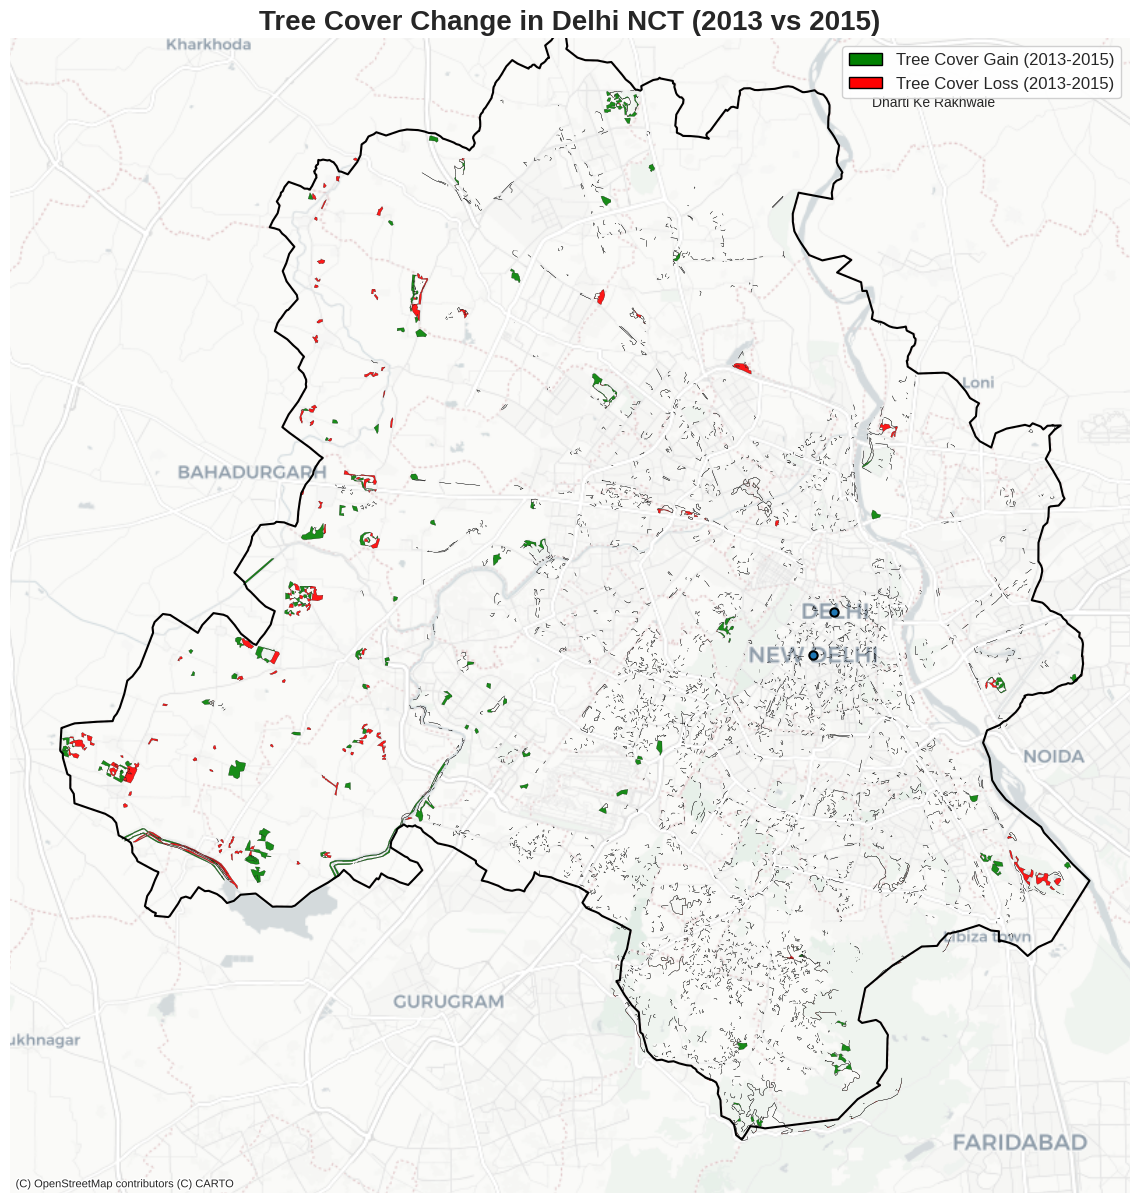


--- Processing 2015 vs 2017 ---


/usr/local/lib/python3.12/dist-packages/geopandas/tools/overlay.py:358: UserWarning: `keep_geom_type=True` in overlay resulted in 56 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  result = _collection_extract(result, geom_type, keep_geom_type_warning)
/usr/local/lib/python3.12/dist-packages/geopandas/tools/overlay.py:358: UserWarning: `keep_geom_type=True` in overlay resulted in 522 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  result = _collection_extract(result, geom_type, keep_geom_type_warning)


✅ Map successfully created and saved as 'map_2015_vs_2017.png'


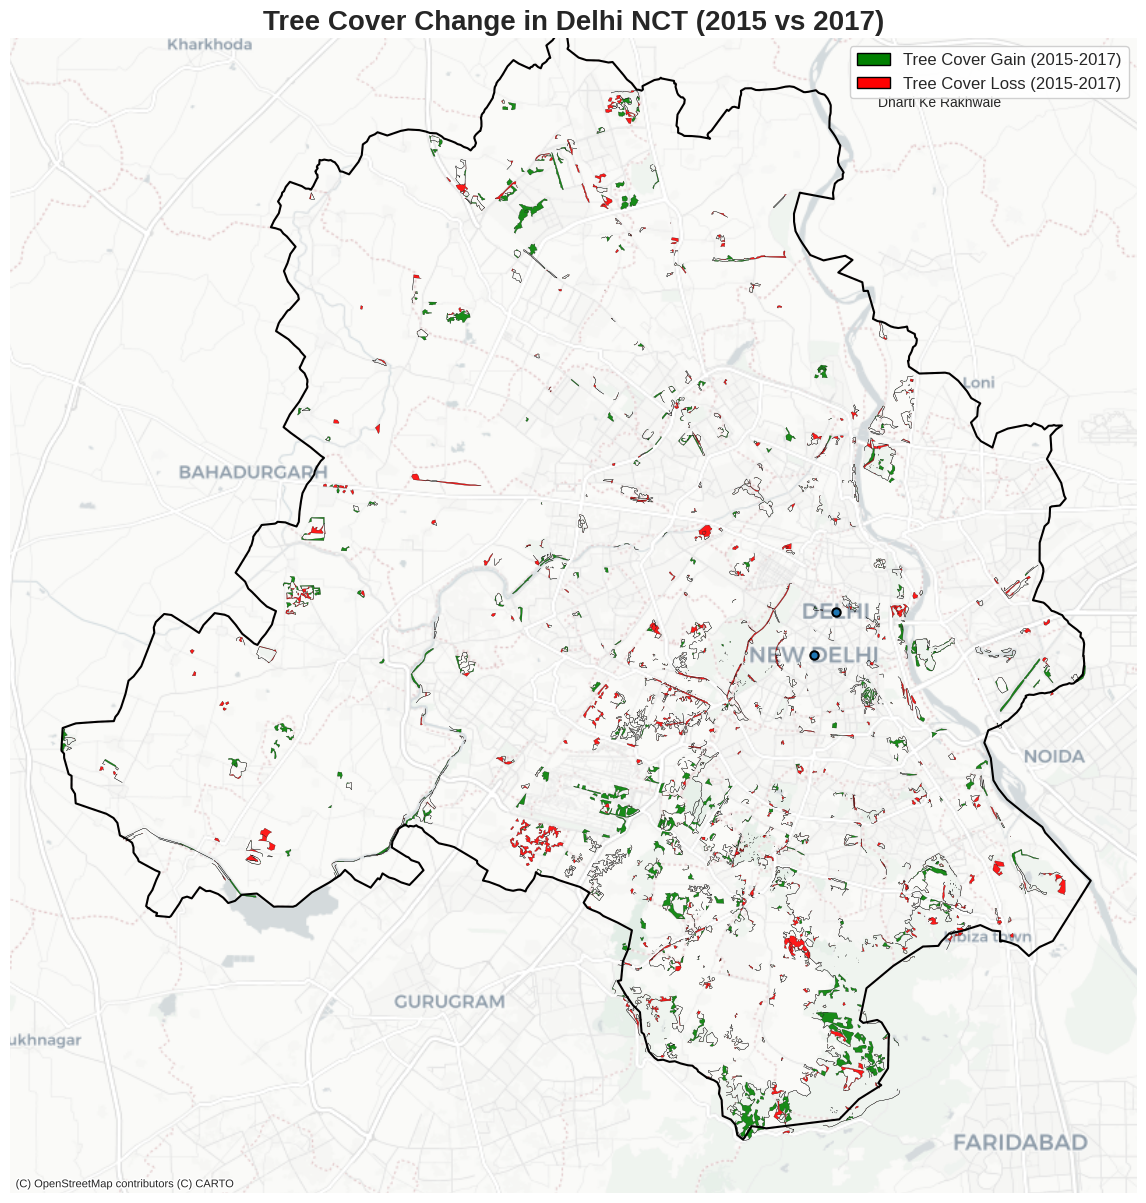


--- Processing 2017 vs 2019 ---


/usr/local/lib/python3.12/dist-packages/geopandas/tools/overlay.py:358: UserWarning: `keep_geom_type=True` in overlay resulted in 327 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  result = _collection_extract(result, geom_type, keep_geom_type_warning)
/usr/local/lib/python3.12/dist-packages/geopandas/tools/overlay.py:358: UserWarning: `keep_geom_type=True` in overlay resulted in 135 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  result = _collection_extract(result, geom_type, keep_geom_type_warning)


✅ Map successfully created and saved as 'map_2017_vs_2019.png'


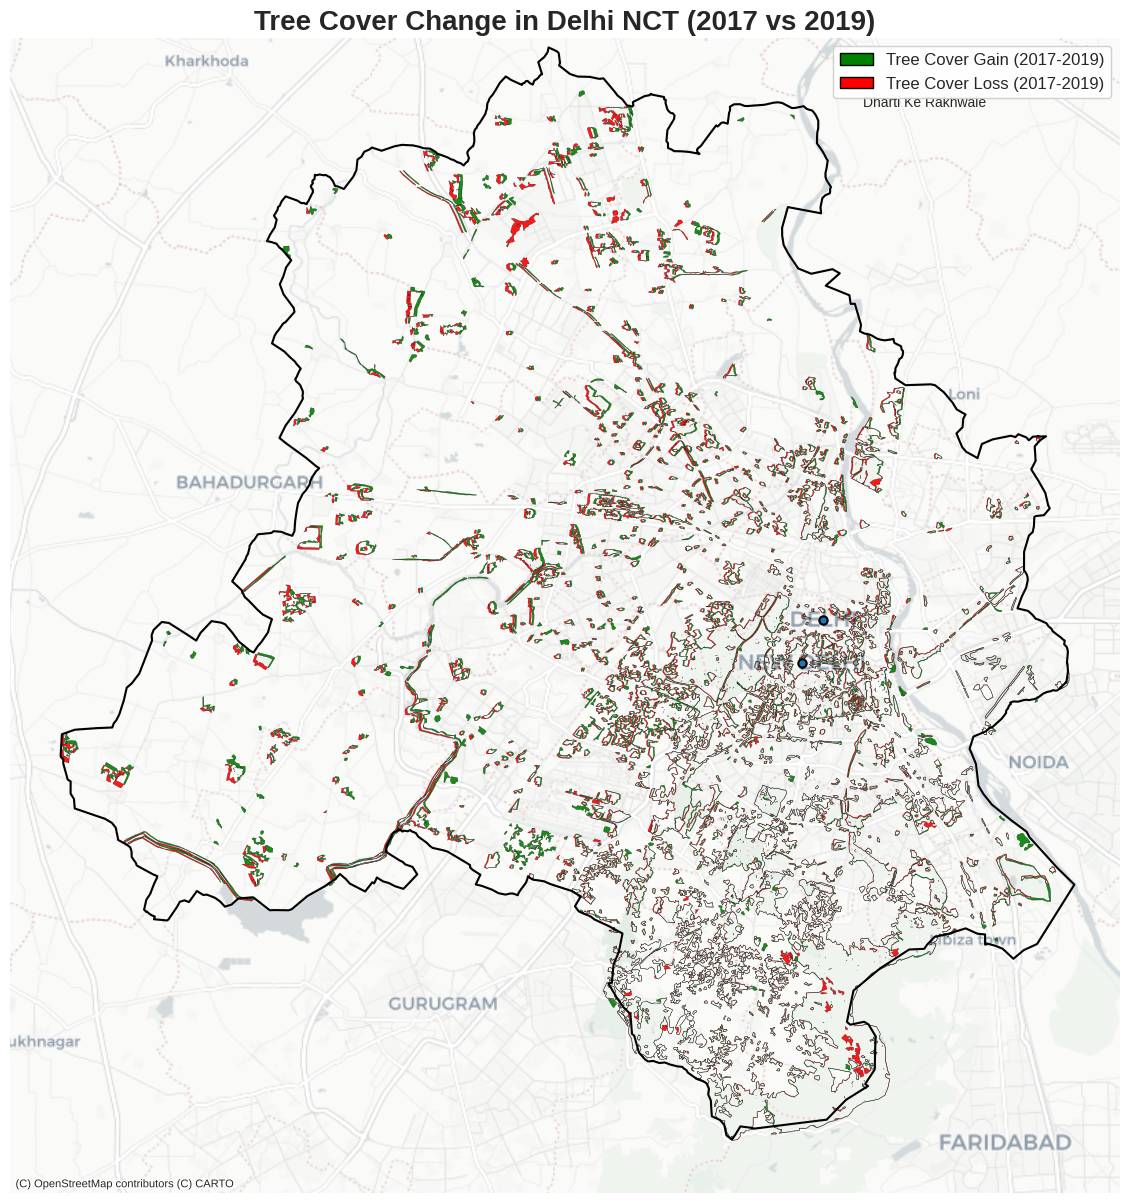


--- Processing 2011 vs 2019 ---


/usr/local/lib/python3.12/dist-packages/geopandas/tools/overlay.py:358: UserWarning: `keep_geom_type=True` in overlay resulted in 149 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  result = _collection_extract(result, geom_type, keep_geom_type_warning)
/usr/local/lib/python3.12/dist-packages/geopandas/tools/overlay.py:358: UserWarning: `keep_geom_type=True` in overlay resulted in 308 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  result = _collection_extract(result, geom_type, keep_geom_type_warning)


✅ Map successfully created and saved as 'map_2011_vs_2019.png'


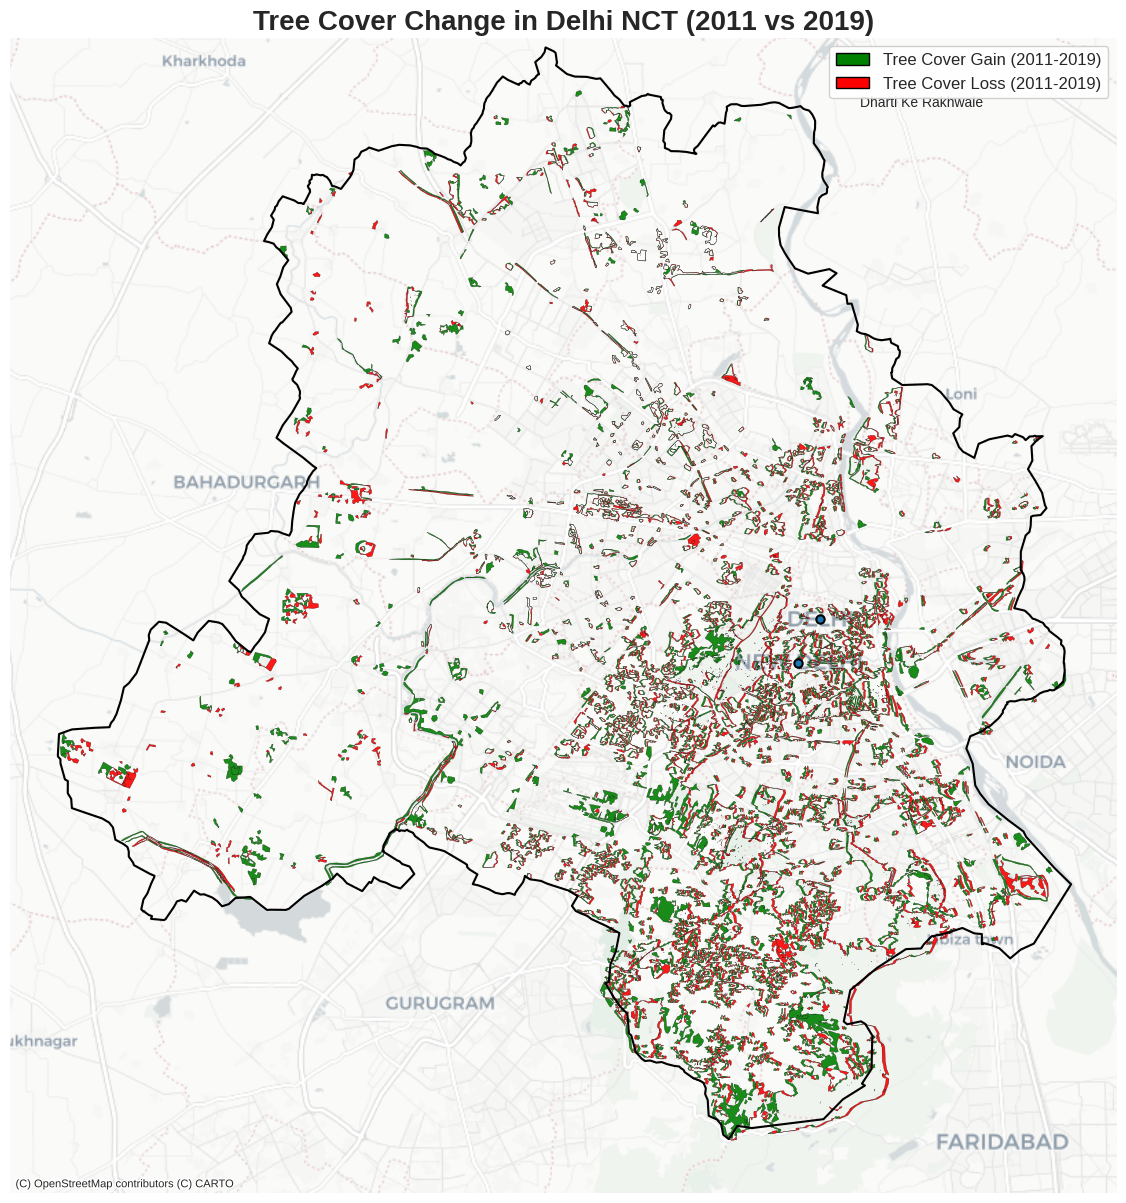


--- All processing complete! ---


In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
from matplotlib.patches import Patch
import os

# --- Style Configuration (Your Control Panel) ---
GAIN_LOSS_ALPHA = 0.9
EDGE_COLOR = 'black'
LINE_WIDTH = 0.2
BOUNDARY_LINEWIDTH = 1.5
BOUNDARY_EDGECOLOR = 'black'
BASEMAP_ALPHA = 1.0
BASEMAP_SOURCE = cx.providers.CartoDB.Positron

# --- File Configuration ---
# IMPORTANT: Update the path to your boundary file
boundary_file = 'delhi.geojson'

# Define the pairs of files to process
# Ensure these filenames match your uploaded files
files_to_process = [
    ('2011.geojson', '2013.geojson'),
    ('2013.geojson', '2015.geojson'),
    ('2015.geojson', '2017.geojson'),
    ('2017.geojson', '2019.geojson'),
    ('2011.geojson', '2019.geojson')
]

# --- Main Loop to Process Each Pair ---
print("Starting automated map generation for all pairs...")

for start_file, end_file in files_to_process:
    try:
        start_year = os.path.basename(start_file).split('.')[0]
        end_year = os.path.basename(end_file).split('.')[0]

        print(f"\n--- Processing {start_year} vs {end_year} ---")

        # Read files
        gdf_boundary = gpd.read_file(boundary_file)
        gdf_start = gpd.read_file(start_file)
        gdf_end = gpd.read_file(end_file)

        # Perform Spatial Difference
        gain = gpd.overlay(gdf_end, gdf_start, how='difference')
        loss = gpd.overlay(gdf_start, gdf_end, how='difference')

        # Convert CRS for Web Mapping
        gain = gain.to_crs(epsg=3857)
        loss = loss.to_crs(epsg=3857)
        gdf_boundary = gdf_boundary.to_crs(epsg=3857)

        # --- Create the Map ---
        fig, ax = plt.subplots(1, 1, figsize=(15, 15))

        gain.plot(ax=ax, color='green', alpha=GAIN_LOSS_ALPHA, edgecolor=EDGE_COLOR, linewidth=LINE_WIDTH)
        loss.plot(ax=ax, color='red', alpha=GAIN_LOSS_ALPHA, edgecolor=EDGE_COLOR, linewidth=LINE_WIDTH)
        cx.add_basemap(ax, source=BASEMAP_SOURCE, alpha=BASEMAP_ALPHA)
        gdf_boundary.plot(ax=ax, facecolor='none', edgecolor=BOUNDARY_EDGECOLOR, linewidth=BOUNDARY_LINEWIDTH)

        # Create the custom legend
        legend_elements = [Patch(facecolor='green', edgecolor='k', label=f'Tree Cover Gain ({start_year}-{end_year})'),
                           Patch(facecolor='red', edgecolor='k', label=f'Tree Cover Loss ({start_year}-{end_year})')]
        ax.legend(handles=legend_elements, loc='upper right', fontsize=12, frameon=True, facecolor='white', framealpha=0.9)

        # Set dynamic title
        ax.set_title(f'Tree Cover Change in Delhi NCT ({start_year} vs {end_year})', fontsize=20, fontweight='bold')
        ax.set_axis_off()

        # Save the map with a dynamic filename
        output_map_filename = f'map_{start_year}_vs_{end_year}.png'
        plt.savefig(output_map_filename, dpi=300, bbox_inches='tight')
        plt.text(
            0.88, 0.95, 'Dharti Ke Rakhwale', transform=ax.transAxes, fontsize=10,
            verticalalignment='top', horizontalalignment='right'
        )
        print(f"✅ Map successfully created and saved as '{output_map_filename}'")
        plt.show()

    except Exception as e:
        print(f"❌ An error occurred while processing {start_year} vs {end_year}: {e}")

print("\n--- All processing complete! ---")